In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [154]:
#reading in Google Trend Scores for queries of "Elon Musk"
colnames=['Datetime', 'Score', 'Y'] 
etrend = pd.read_csv("../../data/elon_google_trend_new.csv",names=colnames, header=None).drop(columns=['Y'])

In [155]:
etrend.head()

,Datetime,Score
0,2016/5/29,9
1,2016/6/5,8
2,2016/6/12,6
3,2016/6/19,7
4,2016/6/26,5


In [156]:
etrend.tail()

,Datetime,Score
146,2019/3/17,14
147,2019/3/24,11
148,2019/3/31,25
149,2019/4/7,13
150,2019/4/14,15


In [157]:
I=etrend["Score"].idxmax()
I

88

In [158]:
etrend.iloc[I,:]

Datetime    2018/2/4
Score            100
Name: 88, dtype: object

In [159]:
etrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
Datetime    151 non-null object
Score       151 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [160]:
etrend.sort_values(by=["Score"],ascending=False).head()

,Datetime,Score
88,2018/2/4,100
118,2018/9/2,67
119,2018/9/9,55
101,2018/5/6,49
122,2018/9/30,49


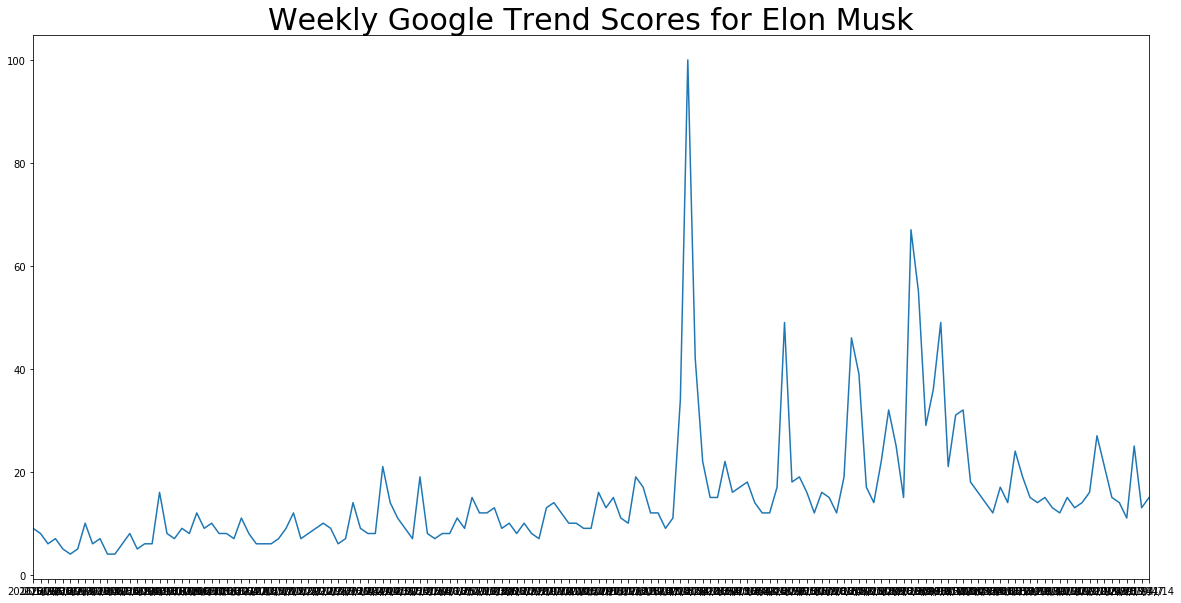

In [161]:
#plot the GoogleTrend scores over time
x=etrend["Datetime"]
y=etrend["Score"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title("Weekly Google Trend Scores for Elon Musk", fontsize=30)
ax.set_xlim(('2016/5/29', '2019/4/14'))

plt.show()

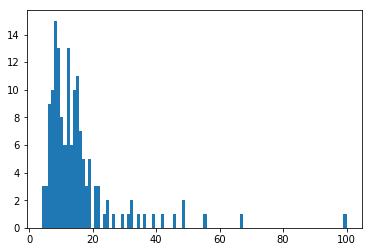

In [162]:
#distribution of scores
import matplotlib.pyplot as plt
plt.hist(etrend["Score"], bins=100)
plt.show()


In [163]:
#convert string to datetime
etrend["Date"]=pd.to_datetime(etrend["Datetime"])
etrend=etrend.drop(columns=["Datetime"])

In [164]:
etrend.head()

,Score,Date
0,9,2016-05-29
1,8,2016-06-05
2,6,2016-06-12
3,7,2016-06-19
4,5,2016-06-26


In [165]:
#obtain year and month columns
etrend['year']= etrend['Date'].dt.year
etrend['month']=etrend['Date'].dt.month

In [166]:
etrend.head()

,Score,Date,year,month
0,9,2016-05-29,2016,5
1,8,2016-06-05,2016,6
2,6,2016-06-12,2016,6
3,7,2016-06-19,2016,6
4,5,2016-06-26,2016,6


In [167]:
#divide data according to year
etrend_2016=etrend[etrend["year"]==2016]
etrend_2016.head()

,Score,Date,year,month
0,9,2016-05-29,2016,5
1,8,2016-06-05,2016,6
2,6,2016-06-12,2016,6
3,7,2016-06-19,2016,6
4,5,2016-06-26,2016,6


In [168]:
etrend_2017=etrend[etrend["year"]==2017].reset_index()
etrend_2017.head()

,index,Score,Date,year,month
0,31,6,2017-01-01,2017,1
1,32,6,2017-01-08,2017,1
2,33,7,2017-01-15,2017,1
3,34,9,2017-01-22,2017,1
4,35,12,2017-01-29,2017,1


In [169]:
etrend_2018=etrend[etrend["year"]==2018].reset_index()
etrend_2018.head()

,index,Score,Date,year,month
0,84,12,2018-01-07,2018,1
1,85,9,2018-01-14,2018,1
2,86,11,2018-01-21,2018,1
3,87,34,2018-01-28,2018,1
4,88,100,2018-02-04,2018,2


In [170]:
etrend_2019=etrend[etrend["year"]==2019].reset_index()
etrend_2019.head()

,index,Score,Date,year,month
0,136,15,2019-01-06,2019,1
1,137,13,2019-01-13,2019,1
2,138,12,2019-01-20,2019,1
3,139,15,2019-01-27,2019,1
4,140,13,2019-02-03,2019,2


In [171]:
#sum up each month's weekly google trend score as the monthly google trend score
m1=etrend_2016.groupby('month',as_index=False)['Score'].sum()
m1["year"]=etrend_2016["year"]
m1


,month,Score,year
0,5,9,2016
1,6,26,2016
2,7,32,2016
3,8,22,2016
4,9,33,2016
5,10,44,2016
6,11,35,2016
7,12,32,2016


In [172]:
type(m1)

pandas.core.frame.DataFrame

In [174]:
m2=etrend_2017.groupby('month',as_index=False)['Score'].sum()
m2["year"]=etrend_2017["year"]
m2

,month,Score,year
0,1,40,2017
1,2,34,2017
2,3,36,2017
3,4,60,2017
4,5,46,2017
5,6,31,2017
6,7,59,2017
7,8,40,2017
8,9,38,2017
9,10,55,2017


In [175]:
m3=etrend_2018.groupby('month',as_index=False)['Score'].sum()
m3["year"]=etrend_2018["year"]
m3

,month,Score,year
0,1,66,2018
1,2,179,2018
2,3,70,2018
3,4,73,2018
4,5,102,2018
5,6,55,2018
6,7,135,2018
7,8,94,2018
8,9,236,2018
9,10,102,2018


In [176]:
m4=etrend_2019.groupby('month',as_index=False)['Score'].sum()
m4["year"]=etrend_2019["year"]
m4

,month,Score,year
0,1,55,2019
1,2,70,2019
2,3,86,2019
3,4,28,2019


In [178]:
#combine
frames = [m1, m2, m3, m4]
a=pd.concat(frames).reset_index().drop(columns=["index"])
a

,month,Score,year
0,5,9,2016
1,6,26,2016
2,7,32,2016
3,8,22,2016
4,9,33,2016
5,10,44,2016
6,11,35,2016
7,12,32,2016
8,1,40,2017
9,2,34,2017


In [179]:
#read in elon's tweets, filtered using "tesla"
elon = pd.read_csv("../../data/twitter/elon_main_2019_05_07_jing.csv")
elon.head()

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18


In [180]:
#obtaining "Datetime", year, month, day, date and day of week columns 
elon["Datetime"]=pd.to_datetime(elon["Datetime"],utc=False)
elon['year']= elon['Datetime'].dt.year
elon['month']=elon['Datetime'].dt.month
elon['day']=elon['Datetime'].dt.day
elon['date']=elon['Datetime'].dt.date
elon['DayofWeek']=elon['Datetime'].dt.weekday

In [181]:
elon.head()

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,2019,4,14,2019-04-14,6
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18,2019,4,14,2019-04-14,6
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18,2019,4,14,2019-04-14,6
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18,2019,4,14,2019-04-14,6
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18,2019,4,14,2019-04-14,6


In [182]:
#append google trend score to tweet according to year and month the tweet was published in 
elon["gtrend"]=elon["year"]
for i in range(772):
    if elon["year"][i]==2016:
        if elon["month"][i]==5:
            elon["gtrend"][i]=a["Score"][0]
        elif elon["month"][i]==6:
            elon["gtrend"][i]=a["Score"][1]
        elif elon["month"][i]==7:
            elon["gtrend"][i]=a["Score"][2]
        elif elon["month"][i]==8:
            elon["gtrend"][i]=a["Score"][3]
        elif elon["month"][i]==9:
            elon["gtrend"][i]=a["Score"][4]
        elif elon["month"][i]==10:
            elon["gtrend"][i]=a["Score"][5]
        elif elon["month"][i]==11:
            elon["gtrend"][i]=a["Score"][6]
        elif elon["month"][i]==12:
            elon["gtrend"][i]=a["Score"][7]
        else:
            elon["gtrend"][i]=0
    elif elon["year"][i]==2017:
        if elon["month"][i]==1:
            elon["gtrend"][i]=a["Score"][8]
        elif elon["month"][i]==2:
            elon["gtrend"][i]=a["Score"][9]
        elif elon["month"][i]==3:
            elon["gtrend"][i]=a["Score"][10]
        elif elon["month"][i]==4:
            elon["gtrend"][i]=a["Score"][11]
        elif elon["month"][i]==5:
            elon["gtrend"][i]=a["Score"][12]
        elif elon["month"][i]==6:
            elon["gtrend"][i]=a["Score"][13]
        elif elon["month"][i]==7:
            elon["gtrend"][i]=a["Score"][14]
        elif elon["month"][i]==8:
            elon["gtrend"][i]=a["Score"][15]
        elif elon["month"][i]==9:
            elon["gtrend"][i]=a["Score"][16]
        elif elon["month"][i]==10:
            elon["gtrend"][i]=a["Score"][17]
        elif elon["month"][i]==11:
            elon["gtrend"][i]=a["Score"][18]
        else:
            elon["gtrend"][i]=a["Score"][19]
            
    elif elon["year"][i]==2018:
        if elon["month"][i]==1:
            elon["gtrend"][i]=a["Score"][20]
        elif elon["month"][i]==2:
            elon["gtrend"][i]=a["Score"][21]
        elif elon["month"][i]==3:
            elon["gtrend"][i]=a["Score"][22]
        elif elon["month"][i]==4:
            elon["gtrend"][i]=a["Score"][23]
        elif elon["month"][i]==5:
            elon["gtrend"][i]=a["Score"][24]
        elif elon["month"][i]==6:
            elon["gtrend"][i]=a["Score"][25]
        elif elon["month"][i]==7:
            elon["gtrend"][i]=a["Score"][26]
        elif elon["month"][i]==8:
            elon["gtrend"][i]=a["Score"][27]
        elif elon["month"][i]==9:
            elon["gtrend"][i]=a["Score"][28]
        elif elon["month"][i]==10:
            elon["gtrend"][i]=a["Score"][29]
        elif elon["month"][i]==11:
            elon["gtrend"][i]=a["Score"][30]
        else:
            elon["gtrend"][i]=a["Score"][31]
    elif elon["year"][i]==2019:
        if elon["month"][i]==1:
            elon["gtrend"][i]=a["Score"][32]
        elif elon["month"][i]==2:
            elon["gtrend"][i]=a["Score"][33]
        elif elon["month"][i]==3:
            elon["gtrend"][i]=a["Score"][34]
        else:
            elon["gtrend"][i]=a["Score"][35]
    else:
        elon["gtrend"][i]=0
        
    

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to b

In [183]:
elon.head(150)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek,gtrend
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,2019,4,14,2019-04-14,6,28
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18,2019,4,14,2019-04-14,6,28
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18,2019,4,14,2019-04-14,6,28
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18,2019,4,14,2019-04-14,6,28
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18,2019,4,14,2019-04-14,6,28
5,31,2019-04-14 08:42:00+00:00,95,1185,"there is 35 gwh/yr “theoretical capacity”, but...",1117347290585243648,NaN,True,tsrandall,1.116352e+18,2019,4,14,2019-04-14,6,28
6,33,2019-04-13 19:59:00+00:00,17,380,"yes, all cars with autopilot 2.0 or higher, so...",1117155252795346944,NaN,True,GregMatson,1.117117e+18,2019,4,13,2019-04-13,5,28
7,39,2019-04-13 19:17:00+00:00,424,6190,incorrect. pana cell lines at giga are only at...,1117144865299501056,NaN,True,tsrandall,1.116352e+18,2019,4,13,2019-04-13,5,28
8,40,2019-04-13 17:33:00+00:00,63,916,tesla will start fsd computer upgrade in a few...,1117118581865476096,NaN,True,kneibert,1.117117e+18,2019,4,13,2019-04-13,5,28
9,43,2019-04-13 17:26:00+00:00,2129,42658,please note that the price of the tesla full s...,1117116982778679297,NaN,False,NaN,1.117117e+18,2019,4,13,2019-04-13,5,28


In [184]:
elon.tail(150)
#for tweets published earlier than 2016, gtrend column score is simply the value of the year for the tweet
#in later notebooks, data earlier than 2016 was discarded

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek,gtrend
927,5554,2013-11-26 00:42:00+00:00,321,256,saw pressure fluctuations on falcon boost stag...,405134552458620928,NaN,False,NaN,4.051346e+17,2013,11,26,2013-11-26,1,2013
928,5560,2013-11-21 19:17:00+00:00,701,435,tesla model s consumer reports customer satisf...,403602986561073152,NaN,False,NaN,4.036030e+17,2013,11,21,2013-11-21,3,2013
929,5561,2013-11-19 17:28:00+00:00,816,579,tesla is also extending the model s warranty t...,402850950500474881,NaN,False,NaN,4.028510e+17,2013,11,19,2013-11-19,1,2013
930,5562,2013-11-19 16:30:00+00:00,738,585,what makes this incredibly unjust is that the ...,402836392566202368,NaN,False,NaN,4.028364e+17,2013,11,19,2013-11-19,1,2013
931,5563,2013-11-19 14:50:00+00:00,3966,2042,why does a tesla fire w no injury get more med...,402811201052090368,NaN,False,NaN,4.028112e+17,2013,11,19,2013-11-19,1,2013
932,5564,2013-11-19 14:21:00+00:00,719,457,mission of teslahttp://www.teslamotors.com/blo...,402803732632453121,NaN,False,NaN,4.028037e+17,2013,11,19,2013-11-19,1,2013
933,5568,2013-11-02 18:56:00+00:00,359,444,thanks woz! @ stevewoz: here to pick up my ne...,396712451305000960,NaN,False,NaN,3.967125e+17,2013,11,2,2013-11-02,5,2013
934,5569,2013-10-30 14:47:00+00:00,446,207,tesla west coast supercharger network now ener...,395562607462981633,NaN,False,NaN,3.955626e+17,2013,10,30,2013-10-30,2,2013
935,5572,2013-10-04 20:02:00+00:00,1294,600,about the model s fire ...http://www.teslamoto...,386219821685170176,NaN,False,NaN,3.862198e+17,2013,10,4,2013-10-04,4,2013
936,5586,2013-09-19 01:16:00+00:00,593,496,am happy to hear that gm plans to develop an a...,380500718387359744,NaN,False,NaN,3.805007e+17,2013,9,19,2013-09-19,3,2013


In [185]:
#export elon as a pickle file
import pickle
with open('../../data/features/2019_05_07_ElonGoogleTrend_Jeff.pickle','wb') as handle: 
    pickle.dump(elon, handle,protocol=pickle.HIGHEST_PROTOCOL)